In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import datetime as dt

plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# https://documentation.bloomreach.com/engagement/docs/rfm-segmentation
# 고객 세그먼트별 비율 
# 고객 세그먼트별 매출 : 1인당 평균 매출, 1인당 평균 주문횟수 등 
# 고객 별 RFM 점수 : 특정 세그먼트 고객 리스트를 필터로 선택할 수 있음 + 각 고객 별 가장 많이, 최근에 구매한 제품/카테고리, 리뷰  
# -> 이에 따른 개인화된 이메일 or 쿠폰 마케팅 
# -> 리뷰 워드클라우드 
# 쿠폰 마케팅 or 이메일 마케팅 or 참여형 마케팅 

In [2]:
customers_df= pd.read_csv('./데이터/이커머스/olist_customers_dataset.csv/olist_customers_dataset.csv')
geolocation_df= pd.read_csv("./데이터/이커머스/olist_geolocation_dataset.csv/olist_geolocation_dataset.csv")
items_df= pd.read_csv('./데이터/이커머스/olist_order_items_dataset.csv/olist_order_items_dataset.csv')
payments_df= pd.read_csv('./데이터/이커머스/olist_order_payments_dataset.csv/olist_order_payments_dataset.csv')
reviews_df= pd.read_csv('./데이터/이커머스/olist_order_reviews_dataset.csv/olist_order_reviews_dataset.csv')
orders_df= pd.read_csv('./데이터/이커머스/olist_orders_dataset.csv/olist_orders_dataset.csv')
products_df= pd.read_csv('./데이터/이커머스/olist_products_dataset.csv/olist_products_dataset.csv')
sellers_df= pd.read_csv('./데이터/이커머스/olist_sellers_dataset.csv')
category_translation_df= pd.read_csv('./데이터/이커머스/product_category_name_translation.csv')

In [3]:
customers_df.head()
# customer_id, customer_unique_id

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
payments_df.head()
# order_id, payment_type

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
reviews_df.head()
# order_id, review_comment_message

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
products_df.head()
# product_id, product_category_name

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
category_translation_df.head()
# product_category_name, product_category_name_english

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [12]:
datasets = [customers_df, geolocation_df, items_df, payments_df, reviews_df, orders_df, products_df, sellers_df, category_translation_df]
titles = ["customers", "geolocation", "items", "payments", "reviews", "orders", "products", "sellers", "category_translation"]

data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col, null in data.isnull().sum().items() ]) for data in datasets]
data_summary['total_rows']= [data.shape[0] for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_duplicate']= [len(data[data.duplicated()]) for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]
data_summary.style.background_gradient(cmap='YlGnBu')

,datasets,columns,total_rows,total_cols,total_duplicate,total_null,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,geolocation,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163,5,261831,0,
2,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
3,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,
4,reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",99224,7,0,145903,"review_comment_title, review_comment_message"
5,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441,8,0,4908,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
6,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951,9,0,2448,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
7,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,
8,category_translation,"product_category_name, product_category_name_english",71,2,0,0,


In [13]:
# 결측값 삭제
for i in datasets:
    i.dropna(inplace=True)

In [14]:
# 중복값 삭제 
for i in datasets:
    i.drop(i[i.duplicated()].index, axis=0, inplace=True)

In [15]:
# 데이터 통합 
merged_df= pd.merge(customers_df, orders_df, on="customer_id")
merged_df= merged_df.merge(reviews_df, on="order_id")
merged_df= merged_df.merge(items_df, on="order_id")
merged_df= merged_df.merge(products_df, on="product_id")
merged_df= merged_df.merge(payments_df, on="order_id")
merged_df= merged_df.merge(sellers_df, on='seller_id')
merged_df= merged_df.merge(category_translation_df, on='product_category_name')
merged_df.shape

(11578, 40)

In [16]:
df = pd.merge(customers_df, orders_df, on="customer_id")
df = merged_df.merge(items_df, on="order_id")
df = merged_df.merge(products_df, on="product_id")
df = df.set_index('customer_unique_id')['product_category_name_english']
df

customer_unique_id
345ecd01c38d18a9036ed96c73b8d066               home_confort
6a8fdf11c6cc553fe201f827da2f4e65               home_confort
c207b575c7935606edefd74a43419a21               home_confort
854c37b10f4e835f6bc91355c9a7346c               home_confort
f2479f8d117c49610d5a2d006b4ab716               home_confort
                                             ...           
7eeb6421712844795dd8ff9ec6a58b18    fashion_underwear_beach
7eeb6421712844795dd8ff9ec6a58b18    fashion_underwear_beach
7eeb6421712844795dd8ff9ec6a58b18    fashion_underwear_beach
7eeb6421712844795dd8ff9ec6a58b18    fashion_underwear_beach
ba1f5988dec5d5dcc36f2d14f2e94b3d     tablets_printing_image
Name: product_category_name_english, Length: 11578, dtype: object

In [17]:
merged_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,15.0,35.0,1,credit_card,8,252.25,14940,ibitinga,SP,home_confort
1,ed9d62c3af1f6b24e984d012f66eca35,6a8fdf11c6cc553fe201f827da2f4e65,45970,itanhem,BA,1dfe970583e8a1a09241aa32a815a5b4,delivered,2018-07-18 17:21:49,2018-07-18 17:35:14,2018-07-19 14:43:00,...,15.0,35.0,1,credit_card,10,278.66,14940,ibitinga,SP,home_confort
2,9dca8837b7f9fc25ae379a58bb66094d,c207b575c7935606edefd74a43419a21,6317,carapicuiba,SP,27fee5c620c806ed4f239ed553fca699,delivered,2018-05-22 12:27:08,2018-05-22 12:56:01,2018-05-22 15:36:00,...,10.0,40.0,1,credit_card,8,95.57,14940,ibitinga,SP,home_confort
3,e19274edf7a9c51689822810be84c9e9,854c37b10f4e835f6bc91355c9a7346c,5772,sao paulo,SP,6f6785dde266434130a2aa8af06a52b7,delivered,2018-06-05 12:14:43,2018-06-05 14:31:37,2018-06-07 08:29:00,...,10.0,40.0,1,credit_card,2,98.68,14940,ibitinga,SP,home_confort
4,3d54e262ab34438486bd0eb8bf022c2f,f2479f8d117c49610d5a2d006b4ab716,91240,porto alegre,RS,00f251b943aba645652c7138e4716fee,delivered,2018-08-13 11:18:25,2018-08-13 11:44:26,2018-08-13 14:37:00,...,10.0,40.0,1,credit_card,1,101.25,14940,ibitinga,SP,home_confort


In [18]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 0 to 11577
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    11578 non-null  object 
 1   customer_unique_id             11578 non-null  object 
 2   customer_zip_code_prefix       11578 non-null  int64  
 3   customer_city                  11578 non-null  object 
 4   customer_state                 11578 non-null  object 
 5   order_id                       11578 non-null  object 
 6   order_status                   11578 non-null  object 
 7   order_purchase_timestamp       11578 non-null  object 
 8   order_approved_at              11578 non-null  object 
 9   order_delivered_carrier_date   11578 non-null  object 
 10  order_delivered_customer_date  11578 non-null  object 
 11  order_estimated_delivery_date  11578 non-null  object 
 12  review_id                      11578 non-null 

In [19]:
# 시간 데이터 타입 변경 
time_columns= ['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date',
               'order_estimated_delivery_date', 'review_creation_date', 'review_answer_timestamp', 'shipping_limit_date']
merged_df[time_columns]=merged_df[time_columns].apply(pd.to_datetime)

In [20]:
# 필요한 열만 남기고 드랍 


In [21]:
# RFM 분석 
# Recency, Frequenct, Monetary

In [22]:
# 현재 날짜 정의 : 최근 구매일로부터 +2일
present_day = merged_df['order_purchase_timestamp'].max() + dt.timedelta(days=2)
present_day

Timestamp('2018-08-31 14:18:28')

In [23]:
# Recency 정의
present_day = merged_df['order_purchase_timestamp'].max() + dt.timedelta(days=2)
print(present_day) # 현재 날짜 정의 : 최근 구매일로부터 +2일

recency_df= pd.DataFrame(merged_df.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max())
recency_df['Recency']= recency_df['order_purchase_timestamp'].apply(lambda x: (present_day - x).days)
recency_df # (현재 날짜 - 고객의 최근 구매날짜)일

# 즉, 최근 구매일로부터 현재까지 113일이 지났다.

2018-08-31 14:18:28


,customer_unique_id,order_purchase_timestamp,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,113
1,000ec5bff359e1c0ad76a81a45cb598f,2018-08-21 11:34:26,10
2,00172711b30d52eea8b313a7f2cced02,2018-07-28 00:23:49,34
3,001928b561575b2821c92254a2327d06,2018-08-24 21:17:00,6
4,0019e8c501c85848ac0966d45226fa1d,2018-05-01 09:25:32,122
...,...,...,...
9328,ffeb904468642a1ce663a322629801cb,2018-06-27 11:57:41,65
9329,ffecceca389973ef16660d58696f281e,2018-04-25 12:08:11,128
9330,fff2ae16b99c6f3c785f0e052f2a9cfb,2018-04-20 11:03:47,133
9331,fff3e1d7bc75f11dc7670619b2e61840,2018-07-20 13:47:30,42


In [24]:
# frequency
frequency_df = pd.DataFrame(merged_df.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index())
frequency_df.rename(columns={"order_id":"Frequency"}, inplace=True)
frequency_df

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,000ec5bff359e1c0ad76a81a45cb598f,1
2,00172711b30d52eea8b313a7f2cced02,1
3,001928b561575b2821c92254a2327d06,1
4,0019e8c501c85848ac0966d45226fa1d,1
...,...,...
9328,ffeb904468642a1ce663a322629801cb,1
9329,ffecceca389973ef16660d58696f281e,1
9330,fff2ae16b99c6f3c785f0e052f2a9cfb,1
9331,fff3e1d7bc75f11dc7670619b2e61840,1


In [25]:
# Momentary
monetary_df = merged_df.groupby('customer_unique_id', as_index=False)['payment_value'].sum()
monetary_df.columns = ['customer_unique_id', 'Monetary']
monetary_df.head()

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,000ec5bff359e1c0ad76a81a45cb598f,27.75
2,00172711b30d52eea8b313a7f2cced02,122.07
3,001928b561575b2821c92254a2327d06,329.62
4,0019e8c501c85848ac0966d45226fa1d,197.27


In [26]:
# RFM 데이터 병합
RF_df = recency_df.merge(frequency_df, on='customer_unique_id')
RFM_df = RF_df.merge(monetary_df, on='customer_unique_id').drop(columns='order_purchase_timestamp')
RFM_df.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90
1,000ec5bff359e1c0ad76a81a45cb598f,10,1,27.75
2,00172711b30d52eea8b313a7f2cced02,34,1,122.07
3,001928b561575b2821c92254a2327d06,6,1,329.62
4,0019e8c501c85848ac0966d45226fa1d,122,1,197.27


In [27]:
RFM_stats_df = RFM_df.describe().T
RFM_stats_df.to_csv('RFM_stats_df.csv')

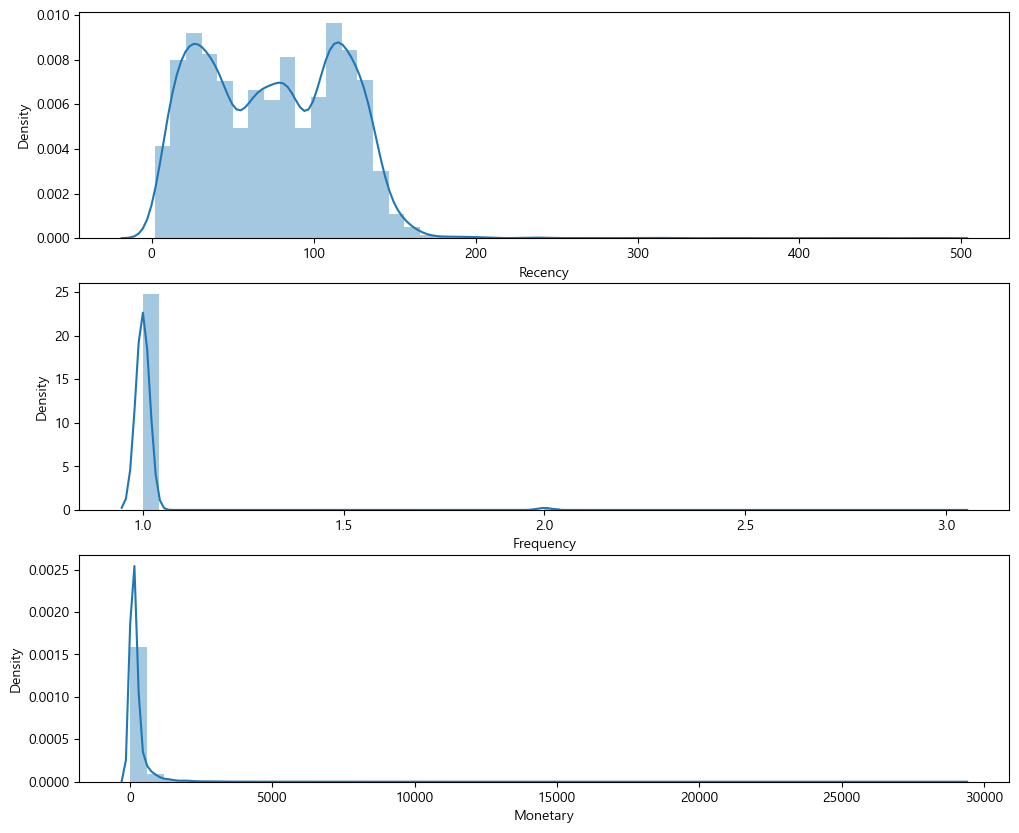

In [28]:
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1); sns.distplot(RFM_df['Recency'])
plt.subplot(3, 1, 2); sns.distplot(RFM_df['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(RFM_df['Monetary'])
plt.show()

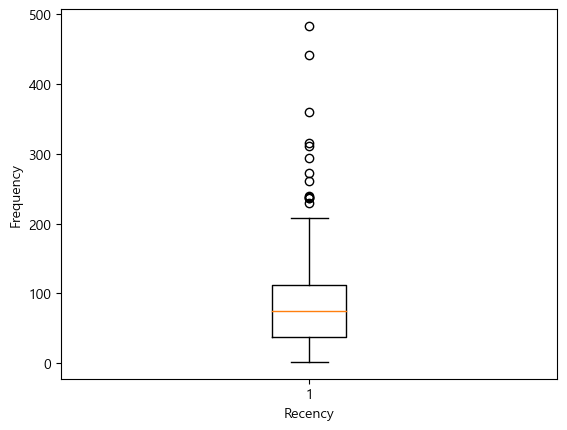

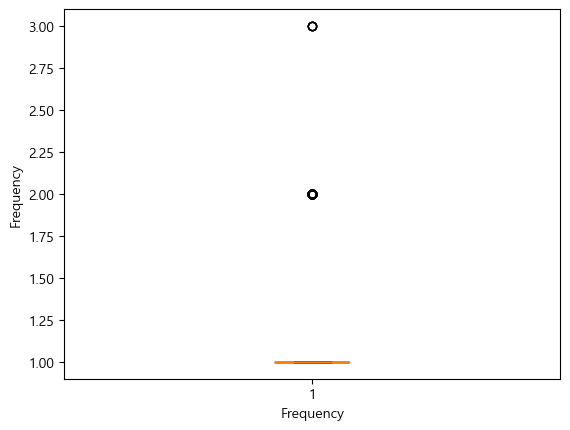

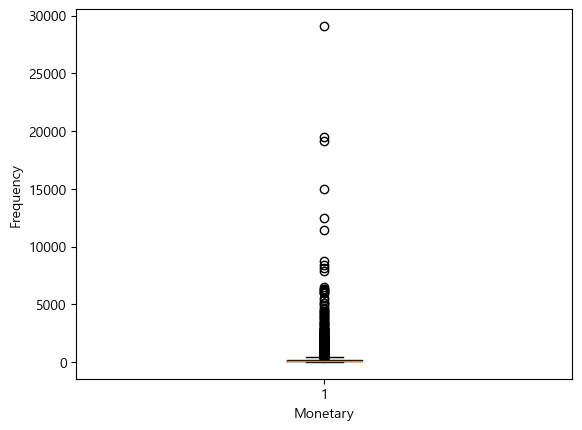

In [29]:
# 이상치 처리
for i in ["Recency", "Frequency", "Monetary"]:
    plt.figure()
    plt.tight_layout()
    plt.gca().set(xlabel= i, ylabel='Frequency')
    plt.boxplot(RFM_df[i])

In [30]:
# 이상치 수를 반환하는 함수 
def num_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers_df= df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    return print("Number of outliers in {} column: ".format(col_name), len(outliers_df)), print("Indexes: ", outliers_df.index)

In [31]:
for i in ["Recency", "Frequency", "Monetary"]:
    num_outlier(RFM_df, i)
    print("*"*40)

Number of outliers in Recency column:  3
Indexes:  Int64Index([828, 2463, 2476], dtype='int64')
****************************************
Number of outliers in Frequency column:  99
Indexes:  Int64Index([  40,   96,  110,  138,  185,  238,  332,  335,  373,  508,  551,
             703,  874, 1093, 1234, 1333, 1428, 1500, 1739, 1786, 2146, 2156,
            2312, 2397, 2402, 2829, 2852, 2899, 2925, 2971, 3084, 3117, 3166,
            3668, 3740, 3824, 3849, 3928, 3938, 4102, 4113, 4221, 4235, 4292,
            4332, 4412, 4442, 4524, 4590, 4681, 4689, 4858, 4912, 5079, 5382,
            5412, 5500, 5672, 5763, 5900, 5945, 6005, 6083, 6090, 6108, 6172,
            6198, 6274, 6389, 6455, 6591, 6694, 6774, 6792, 7160, 7222, 7541,
            7590, 7651, 7763, 7807, 7982, 8085, 8151, 8257, 8417, 8428, 8609,
            8719, 8768, 8786, 8864, 8906, 8951, 8996, 9074, 9185, 9186, 9279],
           dtype='int64')
****************************************
Number of outliers in Monetary column: 

In [32]:
# frequency 열을 제외하고 이상치 제거 
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1     
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    index_outliers= df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)].index
    df_in= pd.DataFrame(df_in.drop(index_outliers.to_list(), axis=0, inplace=True))
    print("Outliers in the {} column have been removed".format(col_name))
    return df_in

In [33]:
for i in ["Recency", "Monetary"]:
    remove_outlier(RFM_df, i)
    print("*"*40)

Outliers in the Recency column have been removed
****************************************
Outliers in the Monetary column have been removed
****************************************


In [34]:
RFM_df2= RFM_df.copy()
RFM_df2= RFM_df2.set_index('customer_unique_id')
RFM_df2

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90
000ec5bff359e1c0ad76a81a45cb598f,10,1,27.75
00172711b30d52eea8b313a7f2cced02,34,1,122.07
001928b561575b2821c92254a2327d06,6,1,329.62
0019e8c501c85848ac0966d45226fa1d,122,1,197.27
...,...,...,...
ffeb904468642a1ce663a322629801cb,65,1,93.11
ffecceca389973ef16660d58696f281e,128,1,72.76
fff2ae16b99c6f3c785f0e052f2a9cfb,133,1,200.90


In [35]:
# RFM Segments
# 고객마다 RFM 점수를 매김
# 산업, 제품마다 RFM 점수 매기는 비율을 다르게 할 수 있을지도 
RFM_df2["recency_score"]  = pd.qcut(RFM_df2['Recency'], 5, labels=[5, 4, 3, 2, 1])
RFM_df2["frequency_score"]= pd.qcut(RFM_df2['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
RFM_df2["monetary_score"] = pd.qcut(RFM_df2['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [36]:
RFM_df2['RFM_SCORE'] = RFM_df2.recency_score.astype(str)+ RFM_df2.frequency_score.astype(str) + RFM_df2.monetary_score.astype(str)
RFM_df2

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90,2,1,3,213
000ec5bff359e1c0ad76a81a45cb598f,10,1,27.75,5,1,1,511
00172711b30d52eea8b313a7f2cced02,34,1,122.07,4,1,3,413
001928b561575b2821c92254a2327d06,6,1,329.62,5,1,5,515
0019e8c501c85848ac0966d45226fa1d,122,1,197.27,1,1,4,114
...,...,...,...,...,...,...,...
ffeb904468642a1ce663a322629801cb,65,1,93.11,3,5,2,352
ffecceca389973ef16660d58696f281e,128,1,72.76,1,5,2,152
fff2ae16b99c6f3c785f0e052f2a9cfb,133,1,200.90,1,5,4,154


In [37]:
# RFM 점수에 따라 고객 세분화 실시
seg_map= {
    r'111|112|121|131|141|151': 'Lost customers',
    r'332|322|233|232|223|222|132|123|122|212|211': 'Hibernating customers', 
    r'155|154|144|214|215|115|114|113': 'Cannot Lose Them',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
    r'331|321|312|221|213|231|241|251': 'About To Sleep',
    r'535|534|443|434|343|334|325|324': 'Need Attention',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
    r'512|511|422|421|412|411|311': 'New Customers',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist',
    r'543|444|435|355|354|345|344|335': 'Loyal',
    r'555|554|544|545|454|455|445': 'Champions'
}

# Lost customers : 구매 안 한지 오래된 고객 -> 관심을 되살리거나 무시, Hibernating customers : 전에 좀 구입했었지만 최근에 구매 안 한지 오래된 고객 -> 과도한 지출X
# Cannot Lose Them : 큰 구입을 자주 했었지만 최근데 오랫동안 돌아오지 않음 -> 최신 제품을 통해 다시 확보, 개인화된 마케팅을 통해 시간 할애, At Risk : cannot lost them과 유사하지만 금전적 가치와 빈도가 낮음 -> 개인화된 마케팅
# Promising : 자주 큰 금액을 지출하지만 마지막 구매는 몇 주 전 -> 맞춤형 쿠폰 제공, Need Attention : 마지막 구매가 한 달 이상 지난 핵심 고객 -> 맞춤형 추천 제공
# About To Sleep : 마지막 구매는 오래전이지만 최근에 사이트를 방문함 -> 할인으로 관심 되돌리기 
# New Customers : 가장 최근에 구매 -> 온보딩, 관계 구축 필요, Potential Loyalist : 좋은 금액을 지출한 최근 고객 -> 멤버십/충성도 프로그램, 참여 유지, 맞춤형 추천 
# Loyal : 정기적으로 주문, 프로모션에 반응 : 더 높은 가치의 제품 상향 판매, 리뷰 요청, Champions : 최근에 구입, 자주 주문, 가장 많이 소비 : 보상, 얼리어답터, 홍보 가능성 높음 

In [38]:
RFM_df2['Segment'] = RFM_df2['recency_score'].astype(str) + RFM_df2['frequency_score'].astype(str) + RFM_df2['monetary_score'].astype(str)
RFM_df2['Segment'] = RFM_df2['Segment'].replace(seg_map, regex=True)
RFM_df2.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,Segment
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90,2,1,3,213,About To Sleep
000ec5bff359e1c0ad76a81a45cb598f,10,1,27.75,5,1,1,511,New Customers
00172711b30d52eea8b313a7f2cced02,34,1,122.07,4,1,3,413,Promising
001928b561575b2821c92254a2327d06,6,1,329.62,5,1,5,515,Promising
0019e8c501c85848ac0966d45226fa1d,122,1,197.27,1,1,4,114,Cannot Lose Them


In [39]:
category_df = pd.merge(RFM_df2, df, on="customer_unique_id")
category_df

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,Segment,product_category_name_english
customer_unique_id,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90,2,1,3,213,About To Sleep,bed_bath_table
000ec5bff359e1c0ad76a81a45cb598f,10,1,27.75,5,1,1,511,New Customers,home_appliances
00172711b30d52eea8b313a7f2cced02,34,1,122.07,4,1,3,413,Promising,stationery
001928b561575b2821c92254a2327d06,6,1,329.62,5,1,5,515,Promising,bed_bath_table
001928b561575b2821c92254a2327d06,6,1,329.62,5,1,5,515,Promising,furniture_living_room
...,...,...,...,...,...,...,...,...,...
ffeb904468642a1ce663a322629801cb,65,1,93.11,3,5,2,352,Potential Loyalist,luggage_accessories
ffecceca389973ef16660d58696f281e,128,1,72.76,1,5,2,152,At Risk,fashion_underwear_beach
fff2ae16b99c6f3c785f0e052f2a9cfb,133,1,200.90,1,5,4,154,Cannot Lose Them,office_furniture


In [40]:
duplicated_id = category_df[category_df.index.duplicated()].index
category_df[category_df.index.duplicated()]

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,Segment,product_category_name_english
customer_unique_id,,,,,,,,,
001928b561575b2821c92254a2327d06,6,1,329.62,5,1,5,515,Promising,furniture_living_room
0025795df7a7d077c4c90162fa820085,38,1,428.16,4,1,5,415,Promising,stationery
0035029989e6fc5cf030918a5f9f2037,110,1,1092.24,2,1,5,215,Cannot Lose Them,luggage_accessories
00504b68faa074d0f40adcb4f7727f71,19,1,397.40,5,1,5,515,Promising,bed_bath_table
00ae50eb5e1d2514f694dee1dcbbd5ae,112,1,1380.55,2,1,5,215,Cannot Lose Them,furniture_decor
...,...,...,...,...,...,...,...,...,...
fe81bb32c243a86b2f86fbf053fe6140,71,2,1384.32,3,5,5,355,Loyal,watches_gifts
fee24222fefa5a001d302a0492fecc7d,18,1,504.72,5,5,5,555,Champions,bed_bath_table
ff61f2506ff81e50510d8c0ac5570c30,97,1,254.42,2,5,5,255,At Risk,housewares


In [41]:
category_df[category_df.index=='001928b561575b2821c92254a2327d06']

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,Segment,product_category_name_english
customer_unique_id,,,,,,,,,
001928b561575b2821c92254a2327d06,6,1,329.62,5,1,5,515,Promising,bed_bath_table
001928b561575b2821c92254a2327d06,6,1,329.62,5,1,5,515,Promising,furniture_living_room


In [42]:
for idd in duplicated_id:
    prod = category_df.loc[category_df.index==idd, 'product_category_name_english']
    print(prod.values)
    break

['bed_bath_table' 'furniture_living_room']


In [43]:
prod = category_df.reset_index().groupby('customer_unique_id')['product_category_name_english'].agg(pd.Series.mode).values
prod

array(['bed_bath_table', 'home_appliances', 'stationery', ...,
       'office_furniture', 'computers_accessories', 'watches_gifts'],
      dtype=object)

In [44]:
# 중복제거
category_df = category_df.loc[~category_df.index.duplicated(keep='first')]
category_df

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,Segment,product_category_name_english
customer_unique_id,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90,2,1,3,213,About To Sleep,bed_bath_table
000ec5bff359e1c0ad76a81a45cb598f,10,1,27.75,5,1,1,511,New Customers,home_appliances
00172711b30d52eea8b313a7f2cced02,34,1,122.07,4,1,3,413,Promising,stationery
001928b561575b2821c92254a2327d06,6,1,329.62,5,1,5,515,Promising,bed_bath_table
0019e8c501c85848ac0966d45226fa1d,122,1,197.27,1,1,4,114,Cannot Lose Them,sports_leisure
...,...,...,...,...,...,...,...,...,...
ffeb904468642a1ce663a322629801cb,65,1,93.11,3,5,2,352,Potential Loyalist,luggage_accessories
ffecceca389973ef16660d58696f281e,128,1,72.76,1,5,2,152,At Risk,fashion_underwear_beach
fff2ae16b99c6f3c785f0e052f2a9cfb,133,1,200.90,1,5,4,154,Cannot Lose Them,office_furniture


In [45]:
category_df['product_category_frequently'] = prod
category_df

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,Segment,product_category_name_english,product_category_frequently
customer_unique_id,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90,2,1,3,213,About To Sleep,bed_bath_table,bed_bath_table
000ec5bff359e1c0ad76a81a45cb598f,10,1,27.75,5,1,1,511,New Customers,home_appliances,home_appliances
00172711b30d52eea8b313a7f2cced02,34,1,122.07,4,1,3,413,Promising,stationery,stationery
001928b561575b2821c92254a2327d06,6,1,329.62,5,1,5,515,Promising,bed_bath_table,"[bed_bath_table, furniture_living_room]"
0019e8c501c85848ac0966d45226fa1d,122,1,197.27,1,1,4,114,Cannot Lose Them,sports_leisure,sports_leisure
...,...,...,...,...,...,...,...,...,...,...
ffeb904468642a1ce663a322629801cb,65,1,93.11,3,5,2,352,Potential Loyalist,luggage_accessories,luggage_accessories
ffecceca389973ef16660d58696f281e,128,1,72.76,1,5,2,152,At Risk,fashion_underwear_beach,fashion_underwear_beach
fff2ae16b99c6f3c785f0e052f2a9cfb,133,1,200.90,1,5,4,154,Cannot Lose Them,office_furniture,office_furniture


In [46]:
category_df.drop(['recency_score', 'frequency_score', 'monetary_score', 'product_category_name_english'], inplace=True, axis=1)
category_df

,Recency,Frequency,Monetary,RFM_SCORE,Segment,product_category_frequently
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90,213,About To Sleep,bed_bath_table
000ec5bff359e1c0ad76a81a45cb598f,10,1,27.75,511,New Customers,home_appliances
00172711b30d52eea8b313a7f2cced02,34,1,122.07,413,Promising,stationery
001928b561575b2821c92254a2327d06,6,1,329.62,515,Promising,"[bed_bath_table, furniture_living_room]"
0019e8c501c85848ac0966d45226fa1d,122,1,197.27,114,Cannot Lose Them,sports_leisure
...,...,...,...,...,...,...
ffeb904468642a1ce663a322629801cb,65,1,93.11,352,Potential Loyalist,luggage_accessories
ffecceca389973ef16660d58696f281e,128,1,72.76,152,At Risk,fashion_underwear_beach
fff2ae16b99c6f3c785f0e052f2a9cfb,133,1,200.90,154,Cannot Lose Them,office_furniture


In [47]:
# 고객 그룹별 통계치 확인
RFMStats = RFM_df2[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(['mean','median', 'min', 'max', 'count'])
RFMStats

Recency                        Frequency             \
                             mean median  min  max count      mean median min   
Segment                                                                         
About To Sleep          93.025000   96.0   60  117   600  1.001667    1.0   1   
At Risk                117.980271  116.0   89  315  1622  1.012330    1.0   1   
Cannot Lose Them       125.384740  125.0   89  272   616  1.009740    1.0   1   
Champions               30.048682   29.0    2   59   493  1.091278    1.0   1   
Hibernating customers  107.546735  108.0   60  311   781  1.000000    1.0   1   
Lost customers         132.042289  129.0  118  261   402  1.000000    1.0   1   
Loyal                   61.446918   67.0    2   88   584  1.025685    1.0   1   
Need Attention          52.857645   58.0    2   88   569  1.000000    1.0   1   
New Customers           40.662857   38.0    2   88   525  1.000000    1.0   1   
Potential Loyalist      43.570724   40.0    2   88  1824  1.008224    1.0   1   
Promising               37.837727   31.0    2   88  1214  1.000000    1.0   1   

                                   Monetary                                  
                      max count        mean   median     min      max count  
Segment                                                                      
About To Sleep          2   600   56.353850   47.750   14.38   147.57   600  
At Risk                 3  1622  287.677275  175.015   58.63  1919.44  1622  
Cannot Lose Them        2   616  321.003961  209.260   98.43  1890.18   616  
Champions               3   493  404.530974  299.070  149.66  1868.97   493  
Hibernating customers   1   781   87.082330   85.300   16.29   148.94   781  
Lost customers          1   402   48.456219   47.225   17.29    97.38   402  
Loyal                   2   584  403.679452  258.910   97.67  1953.15   584  
Need Attention          1   569  255.796450  180.370   97.65  1679.68   569  
New Customers           1   525   56.816933   53.380   14.29    97.59   525  
Potential Loyalist      2  1824   79.567697   76.360   13.89   149.01  1824  
Promising               1  1214  266.907142  179.155   18.70  1957.20  1214

In [48]:
RFMStats['Ratio']= (100*RFMStats['Monetary']["count"]/RFMStats['Monetary']["count"].sum()).round(2)
RFMStats
# 각 세그먼트의 비율 

Recency                        Frequency             \
                             mean median  min  max count      mean median min   
Segment                                                                         
About To Sleep          93.025000   96.0   60  117   600  1.001667    1.0   1   
At Risk                117.980271  116.0   89  315  1622  1.012330    1.0   1   
Cannot Lose Them       125.384740  125.0   89  272   616  1.009740    1.0   1   
Champions               30.048682   29.0    2   59   493  1.091278    1.0   1   
Hibernating customers  107.546735  108.0   60  311   781  1.000000    1.0   1   
Lost customers         132.042289  129.0  118  261   402  1.000000    1.0   1   
Loyal                   61.446918   67.0    2   88   584  1.025685    1.0   1   
Need Attention          52.857645   58.0    2   88   569  1.000000    1.0   1   
New Customers           40.662857   38.0    2   88   525  1.000000    1.0   1   
Potential Loyalist      43.570724   40.0    2   88  1824  1.008224    1.0   1   
Promising               37.837727   31.0    2   88  1214  1.000000    1.0   1   

                                   Monetary                                  \
                      max count        mean   median     min      max count   
Segment                                                                       
About To Sleep          2   600   56.353850   47.750   14.38   147.57   600   
At Risk                 3  1622  287.677275  175.015   58.63  1919.44  1622   
Cannot Lose Them        2   616  321.003961  209.260   98.43  1890.18   616   
Champions               3   493  404.530974  299.070  149.66  1868.97   493   
Hibernating customers   1   781   87.082330   85.300   16.29   148.94   781   
Lost customers          1   402   48.456219   47.225   17.29    97.38   402   
Loyal                   2   584  403.679452  258.910   97.67  1953.15   584   
Need Attention          1   569  255.796450  180.370   97.65  1679.68   569   
New Customers           1   525   56.816933   53.380   14.29    97.59   525   
Potential Loyalist      2  1824   79.567697   76.360   13.89   149.01  1824   
Promising               1  1214  266.907142  179.155   18.70  1957.20  1214   

                       Ratio  
                              
Segment                       
About To Sleep          6.50  
At Risk                17.57  
Cannot Lose Them        6.67  
Champions               5.34  
Hibernating customers   8.46  
Lost customers          4.36  
Loyal                   6.33  
Need Attention          6.16  
New Customers           5.69  
Potential Loyalist     19.76  
Promising              13.15

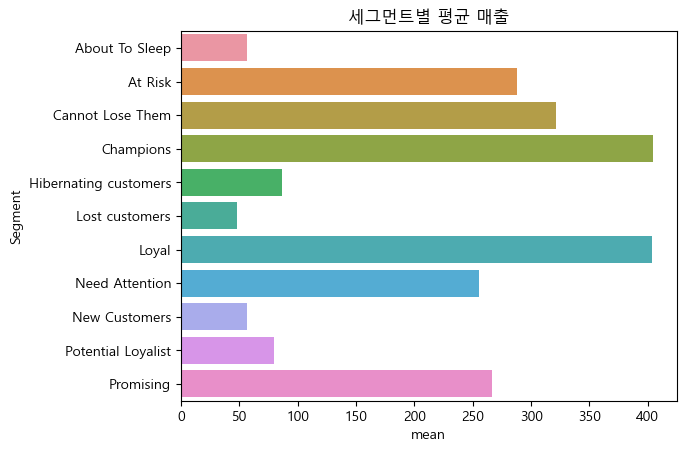

In [49]:
sns.barplot(y=RFMStats.index, x=RFMStats['Monetary']['mean'], orient='h')
plt.title('세그먼트별 평균 매출')
plt.show()

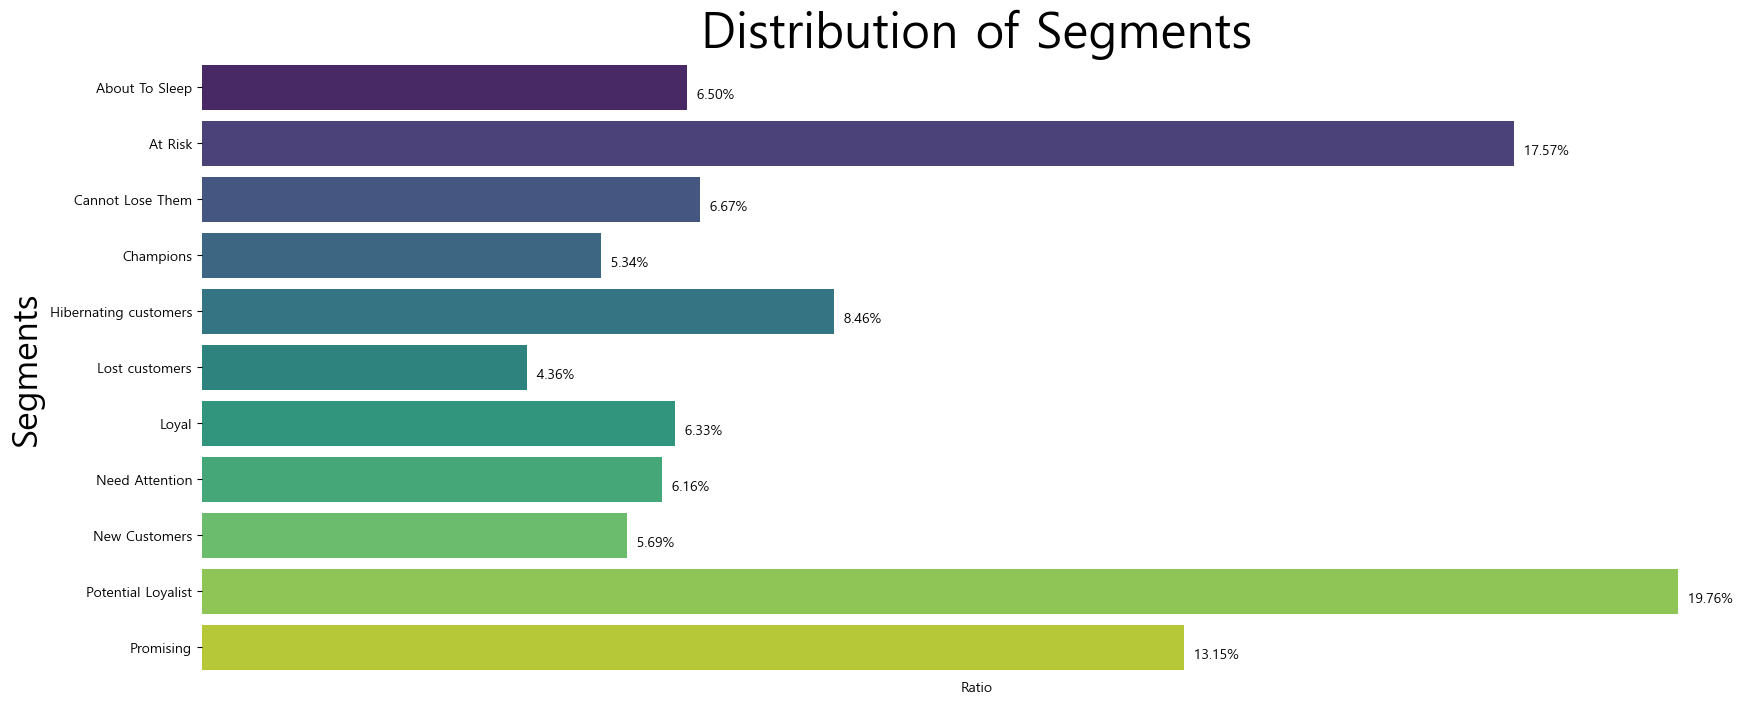

In [50]:
plt.figure(figsize=(20,8))
#plt.rc('font', size=20)
per= sns.barplot(x=RFMStats['Ratio'], y=RFMStats.index, data=RFMStats, palette="viridis")
sns.despine(bottom = True, left = True)
for i, v in enumerate(RFMStats['Ratio']):
    per.text(v, i+.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
per.set_ylabel('Segments', fontsize=25)
per.set(xticks=[])
plt.title('Distribution of Segments', fontsize=35)
plt.show()

In [51]:
# pip install squarify

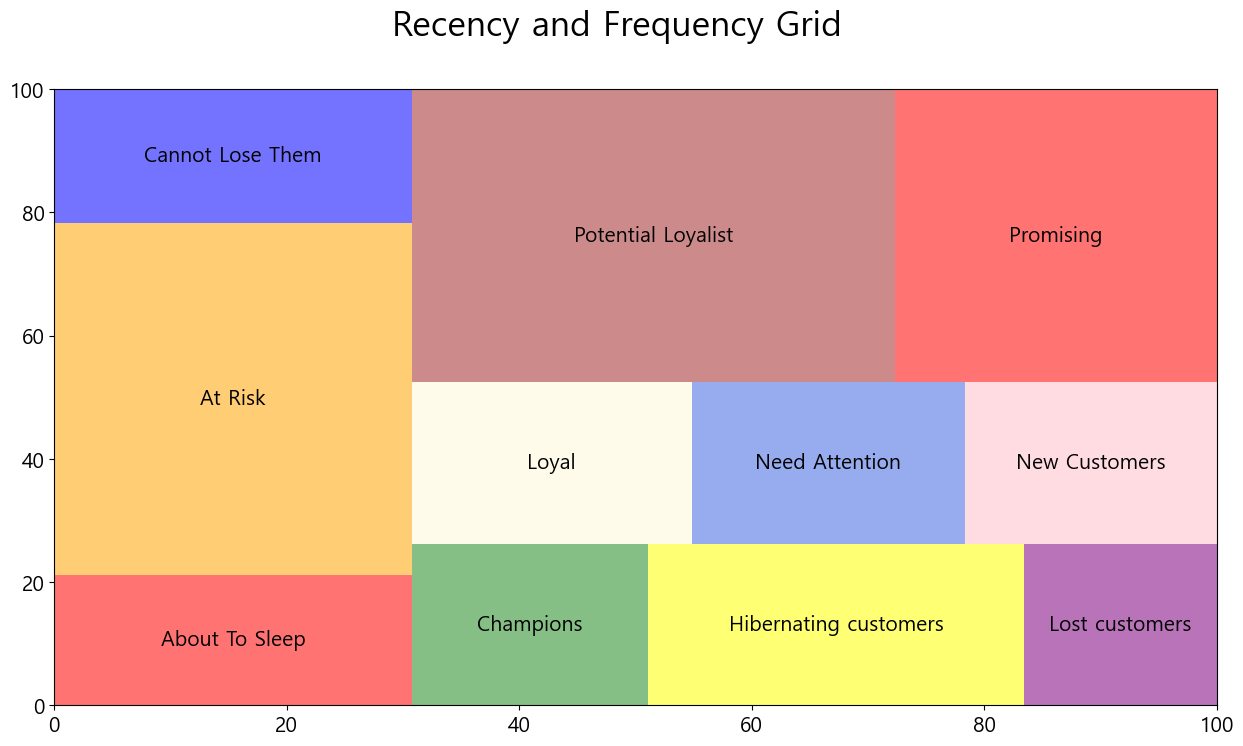

In [52]:
# 트리맵 그리기 
import squarify
plt.figure(figsize=(15,8))
plt.rc('font', size=15)
squarify.plot(sizes=RFMStats["Recency"]["count"], label=RFMStats.index, 
              color=["red","orange","blue", "forestgreen", "yellow", "purple", "cornsilk","royalblue", "pink", "brown"], alpha=.55)
plt.suptitle("Recency and Frequency Grid", fontsize=25);

In [53]:
# K-Means 클러스터링 
RFM_df3= RFM_df2.drop(["recency_score", "frequency_score", "monetary_score", "RFM_SCORE", "Segment"], axis=1)
RFM_df3

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90
000ec5bff359e1c0ad76a81a45cb598f,10,1,27.75
00172711b30d52eea8b313a7f2cced02,34,1,122.07
001928b561575b2821c92254a2327d06,6,1,329.62
0019e8c501c85848ac0966d45226fa1d,122,1,197.27
...,...,...,...
ffeb904468642a1ce663a322629801cb,65,1,93.11
ffecceca389973ef16660d58696f281e,128,1,72.76
fff2ae16b99c6f3c785f0e052f2a9cfb,133,1,200.90


In [54]:
# 각 열의 분포 확인
from scipy import stats #library
def check_skew(df, column):
    skew = stats.skew(df[column])
    skewtest = stats.skewtest(df[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df[column])
    plt.show()
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

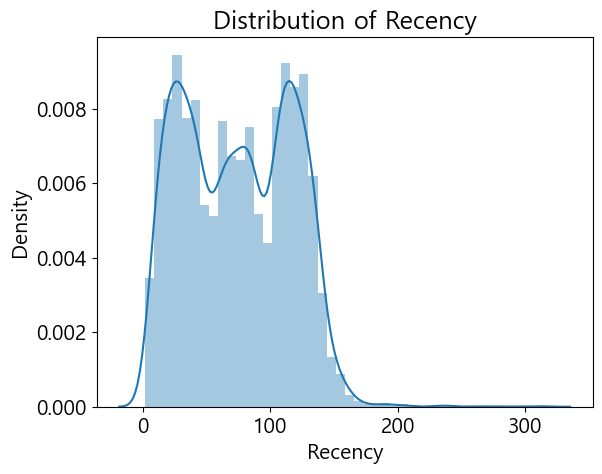

Recency's: Skew: 0.1619372871764706, : SkewtestResult(statistic=6.315734680036571, pvalue=2.6888101178853556e-10)


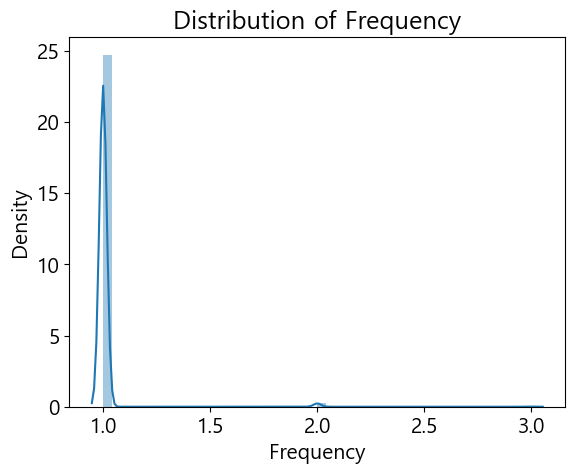

Frequency's: Skew: 10.349645263420909, : SkewtestResult(statistic=103.75024140372159, pvalue=0.0)


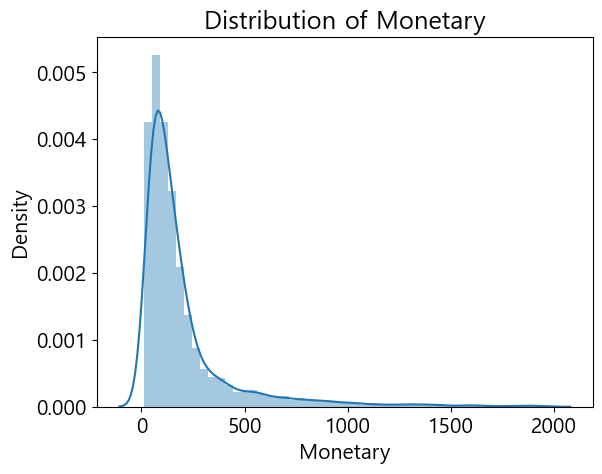

Monetary's: Skew: 3.251446417027698, : SkewtestResult(statistic=67.04111980675697, pvalue=0.0)


In [55]:
for col in RFM_df3.columns:
    check_skew(RFM_df3, col)

In [56]:
# 1보다 크거나 -1보다 작으면 높으면 highly skewed distribution
# 로그 변환을 이용해서 frequency와 monetary 열의 분포를 균일하게
RFM_log= RFM_df3.copy()
for i in RFM_log.columns[1:]:
    RFM_log[i] = np.log10(RFM_log[i])
RFM_log

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,0.0,2.151982
000ec5bff359e1c0ad76a81a45cb598f,10,0.0,1.443263
00172711b30d52eea8b313a7f2cced02,34,0.0,2.086609
001928b561575b2821c92254a2327d06,6,0.0,2.518014
0019e8c501c85848ac0966d45226fa1d,122,0.0,2.295061
...,...,...,...
ffeb904468642a1ce663a322629801cb,65,0.0,1.968996
ffecceca389973ef16660d58696f281e,128,0.0,1.861893
fff2ae16b99c6f3c785f0e052f2a9cfb,133,0.0,2.302980


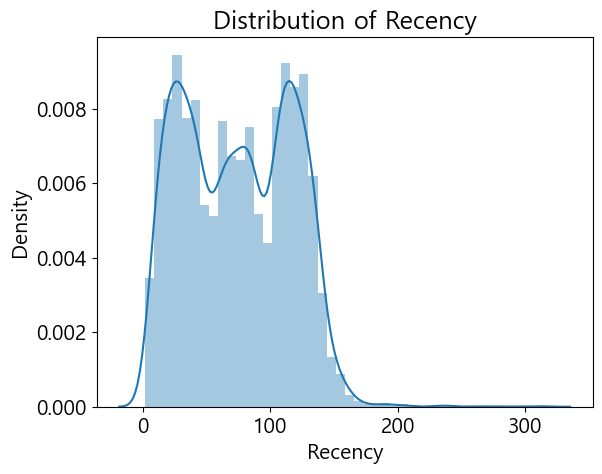

Recency's: Skew: 0.1619372871764706, : SkewtestResult(statistic=6.315734680036571, pvalue=2.6888101178853556e-10)


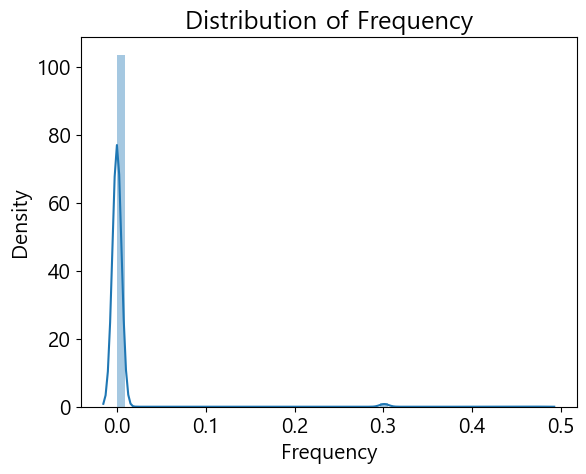

Frequency's: Skew: 9.799276686733617, : SkewtestResult(statistic=102.0025147527467, pvalue=0.0)


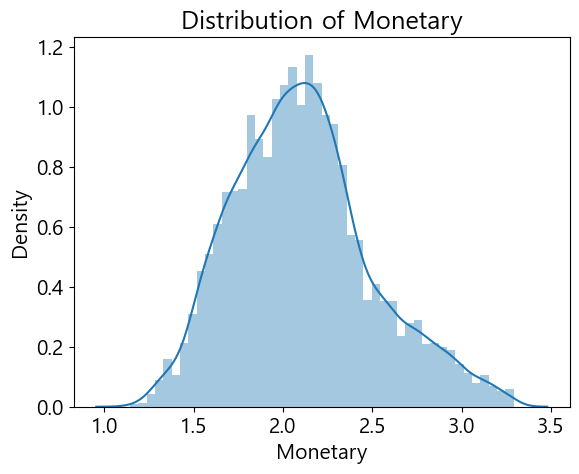

Monetary's: Skew: 0.47086296920199394, : SkewtestResult(statistic=17.58891351121991, pvalue=2.9956623488708254e-69)


In [57]:
for col in RFM_log.columns:
    check_skew(RFM_log, col)

In [58]:
# 데이터 전처리 : 표준화
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

RFM_log_scaled= scaler.fit_transform(RFM_log)
RFM_log_scaled_df= pd.DataFrame(RFM_log_scaled)
RFM_log_scaled_df.columns = ['recency', 'frequency', 'monetary']
RFM_log_scaled_df.head()

,recency,frequency,monetary
0,0.911949,-0.10293,0.110615
1,-1.537370,-0.10293,-1.706436
2,-0.966655,-0.10293,-0.056993
3,-1.632489,-0.10293,1.049064
4,1.125967,-0.10293,0.477447


In [59]:
# 모델링
!pip install yellowbrick

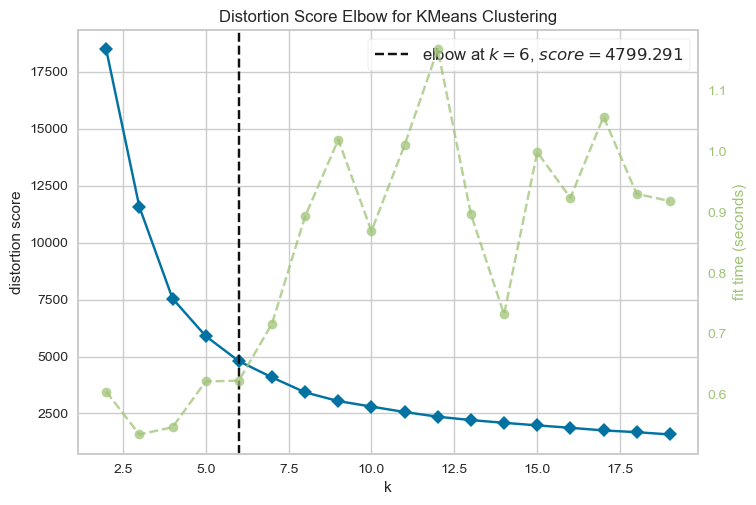

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [60]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

# 군집 수 결정 -> 6으로 결정 
# 파란색 : 각 데이터와 군집 중심과의 평균 거리 
# 초록색 : 학습시간 
k_means = KMeans()
elbow = KElbowVisualizer(k_means, k=(2, 20))
elbow.fit(RFM_log_scaled_df)
elbow.show()

In [61]:
kmeans= KMeans(n_clusters=elbow.elbow_value_)
kmeans.fit(RFM_log_scaled_df)

KMeans(n_clusters=6)

In [62]:
RFM_log_scaled_df['Cluster']= kmeans.labels_
RFM_log_scaled_df.head()

,recency,frequency,monetary,Cluster
0,0.911949,-0.10293,0.110615,3
1,-1.537370,-0.10293,-1.706436,5
2,-0.966655,-0.10293,-0.056993,0
3,-1.632489,-0.10293,1.049064,0
4,1.125967,-0.10293,0.477447,3


In [63]:
# 그룹별 RFM의 통계치 반환 
def rfm_clusters_stat(df):
    df_new = df.groupby(['Cluster']).agg({
            'Recency'  : ['mean','median', 'min', 'max'],
            'Frequency': ['mean','median', 'min', 'max'],
            'Monetary' : ['mean','median', 'min', 'max', 'count']
        }).round(0)

    return df_new

In [64]:
RFM_df4= RFM_df3.copy()
RFM_df4['Cluster'] = kmeans.labels_
rfm_clusters_stat(RFM_df4).style.background_gradient(cmap='YlGnBu')
# 대부분의 고객의 frequency가 1
# 0 :  r과 m이 높음, 가장 많음 -> 충성 고객 
# 1 : 다 낮음 -> 잃은 고객 
# 2 : f가 높은, 가장 적음 -> ,,,
# 3 : 다 낮지만 m이 약간 높음, 두번째로 많음 -> 과거 충성 고객 
# 4 : m이 높음 -> ,,,
# 5 : r이 높음 -> 신규 고객 

Text(0.5, 0.98, 'Segments of Customers')

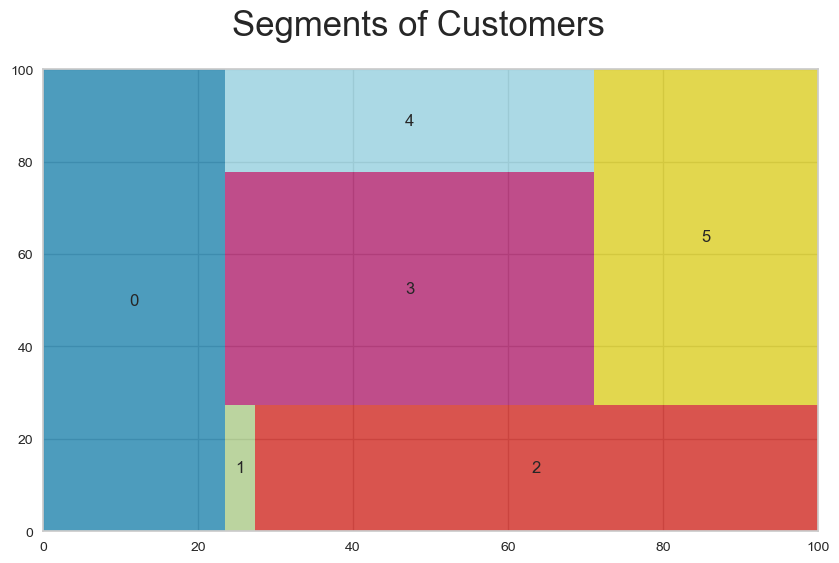

In [65]:
# 그룹 별 크기 시각화 
RFM_stats= pd.DataFrame(rfm_clusters_stat(RFM_df4))
plt.figure(figsize=(10, 6))
squarify.plot(sizes=RFM_stats["Monetary"]["count"], label=RFM_stats.index, color=["b","g","r","m","c", "y"], alpha=0.7)
plt.suptitle("Segments of Customers", fontsize=25)